<a href="https://colab.research.google.com/github/jwang44/crispy-fiesta/blob/main/Feature_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crispy Fiesta

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


#### Load the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('./train.csv',engine='python')
test = pd.read_csv('./test.csv',engine='python')

In [4]:
X_train = train.body  # train texts
y_train = train.subreddit # train subreddits
X_test = test.body  # test texts

#### Visualize the distribution

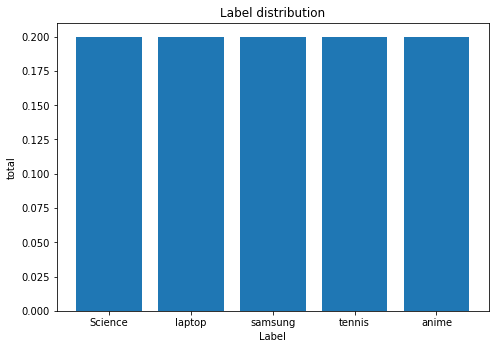

In [5]:
import matplotlib.pyplot as plt
from  collections import  Counter
a=Counter(y_train)
dic = {number: value for number, value in a.items()}
x = ["Science","laptop","samsung","tennis","anime"]
y = []
for i in dic.keys():
  y.append(dic.get(i))
for j in range(5):
  y[j]=y[j]/len(y_train)
df = pd.DataFrame(y, x)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(x,y,align='center')
ax.set_title('Label distribution')
ax.set_xlabel('Label')
ax.set_ylabel('total')
plt.show()

## Feature extraction

### sk-learn processing

In [6]:
from sklearn.preprocessing import Normalizer, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [7]:
# transform target labels to values
le = LabelEncoder()
y_train_num = le.fit_transform(y_train.values) # convert category from string to numerical (!!!!! update the variables in kcross fold)

# vectorize word count
vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)
vectors_train = vectors_train.todense()
vectors_test = vectors_test.todense()

# onehot encoding
onehot = OneHotEncoder(handle_unknown = 'ignore')
vectors_train = onehot.fit_transform(vectors_train)
vectors_test = onehot.transform(vectors_test)

normalizer_train = Normalizer()

# print(vectorizer.get_feature_names())
print(vectors_train.shape)
print(vectors_test.shape)

(1999, 35729)
(1378, 35729)


#### Binary



In [8]:
vectorizer = CountVectorizer(binary=True)
vectors_train_binary = vectorizer.fit_transform(X_train)
vectors_test_binary = vectorizer.transform(X_test)


In [9]:
# tf-idf
tf_idf_vectorizer = TfidfVectorizer()
vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train)
vectors_test_idf = tf_idf_vectorizer.transform(X_test)
vectors_train_idf= normalizer_train.transform(vectors_train_idf)
vectors_test_idf = normalizer_train.transform(vectors_test_idf)
print(vectors_train_idf.shape)
print(vectors_test_idf.shape)

(1999, 15365)
(1378, 15365)


### nltk processing

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


####Stemming
features: `vector_train_stem`, `vector_test_stem`

In [11]:
# stemming
class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(tokenizer=StemTokenizer())
vectors_train_stem = vectorizer.fit_transform(X_train)
vectors_test_stem = vectorizer.transform(X_test)
vectors_train_stem= normalizer_train.transform(vectors_train_stem)
vectors_test_stem = normalizer_train.transform(vectors_test_stem)
print(vectors_train_stem.shape)
print(vectors_test_stem.shape)

(1999, 8727)
(1378, 8727)


#### Lemmatization
features: `vector_train_Lemma`, `vector_test_Lemma`

In [12]:
# Lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
  
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(tokenizer=New_LemmaTokenizer())
vectors_train_Lemma = vectorizer.fit_transform(X_train)
vectors_test_Lemma = vectorizer.transform(X_test)
vectors_train_Lemma= normalizer_train.transform(vectors_train_Lemma)
vectors_test_Lemma = normalizer_train.transform(vectors_test_Lemma)
print(vectors_train_Lemma.shape)
print(vectors_test_Lemma.shape)

(1999, 10045)
(1378, 10045)


#### 6 feature sets

1 features: vectors_train_stop, vectors_test_stop

In [13]:
# remove stop words and punctuation, normalization
stop_words = text.ENGLISH_STOP_WORDS

class PuncTokenizer:
     def __init__(self):
       pass
     def __call__(self, doc):
       return [t for t in word_tokenize(doc) if t.isalpha()]
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer=PuncTokenizer())
vectors_train_stop = vectorizer.fit_transform(X_train)
vectors_test_stop = vectorizer.transform(X_test)

normalizer_train = Normalizer()
vectors_train_stop= normalizer_train.transform(vectors_train_stop)
vectors_test_stop = normalizer_train.transform(vectors_test_stop)
print(vectors_train_stop.shape)
print(vectors_test_stop.shape)
#print(vectorizer.get_feature_names())

(1999, 12402)
(1378, 12402)


2 features: vectors_train_stop_tfidf, vectors_test_stop_tfidf

In [14]:
# remove stop words and punctuation, tfidf, normalization
stop_words = text.ENGLISH_STOP_WORDS

tf_idf_transformer = TfidfTransformer()

class PuncTokenizer:
     def __init__(self):
       pass
     def __call__(self, doc):
       return [t for t in word_tokenize(doc) if t.isalpha()]
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer=PuncTokenizer())
vectors_train_stop_tfidf = vectorizer.fit_transform(X_train)
vectors_train_stop_tfidf = tf_idf_transformer.fit_transform(vectors_train_stop_tfidf)
vectors_test_stop_tfidf = vectorizer.transform(X_test)
vectors_test_stop_tfidf = tf_idf_transformer.transform(vectors_test_stop_tfidf)

vectors_train_stop_tfidf = normalizer_train.transform(vectors_train_stop_tfidf)
vectors_test_stop_tfidf = normalizer_train.transform(vectors_test_stop_tfidf)
print(vectors_train_stop_tfidf.shape)
print(vectors_test_stop_tfidf.shape)

(1999, 12402)
(1378, 12402)


3 features: vectors_train_stop_Lemma, vectors_test_stop_Lemma

In [15]:
# remove stop words and punctuation, lemmatization, normalization
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(stop_words = stop_words, tokenizer = New_LemmaTokenizer())
vectors_train_stop_Lemma = vectorizer.fit_transform(X_train)
vectors_test_stop_Lemma = vectorizer.transform(X_test)
vectors_train_stop_Lemma = normalizer_train.transform(vectors_train_stop_Lemma)
vectors_test_stop_Lemma = normalizer_train.transform(vectors_test_stop_Lemma)

# print(vectorizer.get_feature_names())
print(vectors_train_stop_Lemma.shape)
print(vectors_test_stop_Lemma.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1999, 9779)
(1378, 9779)


4 features: `vectors_train_stop_tfidf_Lemma`, `vectors_test_stop_tfidf_Lemma`

In [16]:
# put it all together: remove stop words and punctuation, tfidf, lemmatization, normalization
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

tf_idf_transformer = TfidfTransformer()
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer = New_LemmaTokenizer())
vectors_train_stop_tfidf_Lemma = vectorizer.fit_transform(X_train)
vectors_train_stop_tfidf_Lemma = tf_idf_transformer.fit_transform(vectors_train_stop_tfidf_Lemma)
vectors_test_stop_tfidf_Lemma = vectorizer.transform(X_test)
vectors_test_stop_tfidf_Lemma = tf_idf_transformer.transform(vectors_test_stop_tfidf_Lemma)
vectors_train_stop_tfidf_Lemma = normalizer_train.transform(vectors_train_stop_tfidf_Lemma)
vectors_test_stop_tfidf_Lemma = normalizer_train.transform(vectors_test_stop_tfidf_Lemma)

# print(vectorizer.get_feature_names())
print(vectors_train_stop_tfidf_Lemma.shape)
print(vectors_test_stop_tfidf_Lemma.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1999, 9779)
(1378, 9779)


5 features: vectors_train_stop_stem, vectors_test_stop_stem

In [17]:
# remove stopwords and punctuation, stemming, normalization
stop_words = text.ENGLISH_STOP_WORDS

class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(stop_words = stop_words, tokenizer=StemTokenizer())
vectors_train_stop_stem = vectorizer.fit_transform(X_train)
vectors_test_stop_stem = vectorizer.transform(X_test)
vectors_train_stop_stem = normalizer_train.transform(vectors_train_stop_stem)
vectors_test_stop_stem = normalizer_train.transform(vectors_test_stop_stem)
print(vectors_train_stop_stem.shape)
print(vectors_test_stop_stem.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1999, 8522)
(1378, 8522)


6 features: vectors_train_stop_tfidf_stem, vectors_test_stop_tfidf_stem

In [18]:
# remove stopwords and punctuation, tfidf, stemming, normalization
stop_words = text.ENGLISH_STOP_WORDS

class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

tf_idf_transformer = TfidfTransformer()
vectorizer = CountVectorizer(stop_words = stop_words, tokenizer=StemTokenizer())
vectors_train_stop_tfidf_stem = vectorizer.fit_transform(X_train)
vectors_train_stop_tfidf_stem = tf_idf_transformer.fit_transform(vectors_train_stop_tfidf_stem)
vectors_test_stop_tfidf_stem = vectorizer.transform(X_test)
vectors_test_stop_tfidf_stem = tf_idf_transformer.transform(vectors_test_stop_tfidf_stem)
vectors_train_stop_tfidf_stem = normalizer_train.transform(vectors_train_stop_tfidf_stem)
vectors_test_stop_tfidf_stem = normalizer_train.transform(vectors_test_stop_tfidf_stem)
print(vectors_train_stop_tfidf_stem.shape)
print(vectors_test_stop_tfidf_stem.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1999, 8522)
(1378, 8522)


#### binary

In [19]:
# put it all together: remove stopwords, punctuation, lemmatization, 
stop_words = text.ENGLISH_STOP_WORDS

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

vectorizer = CountVectorizer(stop_words = stop_words,tokenizer=New_LemmaTokenizer(),binary=True)
vectors_train_stop_Lemma_binary = vectorizer.fit_transform(X_train)
vectors_test_stop_Lemma_binary = vectorizer.transform(X_test)


# print(vectorizer.get_feature_names())
# print(vectors_train_stop_Lemma_binary)
print(vectors_test_stop_Lemma_binary.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(1378, 9779)


## Experiments with models in sk-learn

In [42]:
# from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import KFold, cross_val_score

#### Find the best set of features

We have 6 different sets of features
* vectors_train_stop, vectors_test_stop
* vectors_train_stop_tfidf, vectors_test_stop_tfidf
* vectors_train_stop_Lemma, vectors_test_stop_Lemma
* vectors_train_stop_tfidf_Lemma, vectors_test_stop_tfidf_Lemma
* vectors_train_stop_stem, vectors_test_stop_stem
* vectors_train_stop_tfidf_stem, vectors_test_stop_tfidf_stem




In [22]:
model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop_tfidf, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop_Lemma, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop_tfidf_Lemma, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop_stem, y_train_num, cv=10)
print(scores.mean())

model = LinearSVC()
scores = cross_val_score(model, vectors_train_stop_tfidf_stem, y_train_num, cv=10)
print(scores.mean())

0.9169673366834171
0.925469849246231
0.9239698492462312
0.933964824120603
0.921467336683417
0.9289648241206031


In [23]:
model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop_tfidf, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop_Lemma, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop_tfidf_Lemma, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop_stem, y_train_num, cv=10)
print(scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, vectors_train_stop_tfidf_stem, y_train_num, cv=10)
print(scores.mean())

0.9014497487437186
0.9254648241206029
0.9069597989949749
0.928969849246231
0.9004572864321607
0.927969849246231


In the above two experiments, using LinearSVC and Logistic Regression, the best results are both achieved on the `vectors_train_stop_tfidf_Lemma` feature set. The highest 10-fold cross validation accuracy is 93.39% and 92.89% respectively. 

#### Find the best off-the-shelf model

In [33]:
X = vectors_train_stop_tfidf_Lemma # the best set of feature found in the previous step
y = y_train_num

In [35]:
model = LinearSVC()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------Linear SVC---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Linear SVC---------------
train accu:  1.0
test accu:  0.9319723618090452


In [39]:
model = SVC()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------RBF SVC---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------RBF SVC---------------
train accu:  1.0
test accu:  0.9234698492462311


In [36]:
model = LogisticRegression()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------Logistic Regression---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Linear SVC---------------
train accu:  0.9909955530850473
test accu:  0.929467336683417


In [37]:
model = KNeighborsClassifier()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------K-nearest Neighbor---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Linear SVC---------------
train accu:  0.9056750972762645
test accu:  0.8489095477386934


In [38]:
model = DecisionTreeClassifier()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------Decision Tree---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Linear SVC---------------
train accu:  1.0
test accu:  0.7989145728643218


In [41]:
model = MultinomialNB()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------Multinomial NB---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Multinomial NB---------------
train accu:  0.9808238218763512
test accu:  0.9174748743718592


In [43]:
model = BernoulliNB()
kf = KFold(n_splits=10, shuffle=True)
train_accus = []
test_accus = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_accus.append(model.score(X_train, y_train))
    test_accus.append(model.score(X_test, y_test))
train_accus = np.array(train_accus)
test_accus = np.array(test_accus)
print("-------------Bernoulli NB---------------")
print("train accu: ", train_accus.mean())
print("test accu: ", test_accus.mean())

-------------Bernoulli NB---------------
train accu:  0.9438612809585573
test accu:  0.8469170854271357


#### Grid search

In [48]:
from sklearn.model_selection import GridSearchCV

In [52]:
model = LinearSVC()
parameters = {
    'C': (0.01, 0.1, 1, 10)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_stop_tfidf_Lemma, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.933964824120603
C: 1


In [53]:
model = SVC()
parameters = {
    'C': (0.01, 0.1, 1, 10)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_stop_tfidf_Lemma, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9299673366834172
C: 10


In [57]:
model = LogisticRegression()
parameters = {
    'C': (0.01, 0.1, 1, 10),
    'max_iter': (100, 1000, 5000, 10000)
}
gs_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_model = gs_model.fit(vectors_train_stop_tfidf_Lemma, y_train_num)
print(gs_model.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model.best_params_[param_name]))

0.9334748743718592
C: 10
max_iter: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
gs_model.cv_results_

## Bernoulli NB model

In [ ]:
import time
import random
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
class Bernoulli_NB():
  def __init__(self, LaplaceSmoothing = True):
    self.LaplaceSmoothing = LaplaceSmoothing
    self.Prob_Y = None      # P(Y)
    self.Prob_X_Y = None     # P(xj|Y)
    self.Prob_X_Y = None     # P(xj|Y)
    self.n_class = 0
    self.w0 = None
    self.w = None
    self.Ytarget = None

  def ProbY(self, Y):
    # calculate P(Y=1) and P(Y=0)
    ProbY = np.zeros((1,2))
    ProbY[0,1] = np.sum(Y)/np.shape(Y)
    ProbY[0,0] = 1 - ProbY[0,1]
    return ProbY

  def ProbX_Yi(self, X, Y, label):
    # calculte P(xj=1|Yi=1)
    rows,cols = X.shape       # feature shape
    numerator = np.zeros((1,cols))    # initialize numerator

    # xj=1 and Yi=1
    for n in range(rows):
      if Y[n] == label:
        numerator += X[n,:]
    # Yi=1
    denominator = np.count_nonzero(Y == label)

    # Laplace Smoothing
    if(self.LaplaceSmoothing):
      numerator += 1
      denominator += 2

    # P(xj=1|Yi=1)
    prob = numerator/denominator
    return prob    

  def fit(self, X, Y):
    print('---------------------- start fitting ---------------------')
    t1 = time.time()
    
    rows,cols = X.shape              # feature shape
    self.n_class = len(np.unique(Y))       # number of classes
    self.Prob_Y = np.zeros((self.n_class,2))   # initialize P(Y)
    self.Prob_X_Y = np.zeros((self.n_class,2,cols)) # initialize P(x|Y)
    c = np.zeros((self.n_class,cols))       # rows:class cols:xj
    d = np.zeros((self.n_class,cols))       # rows:class cols:xj
    self.w0 = np.zeros((1,self.n_class))     # [w0Y1,w0Y2,...]
    self.w = np.zeros((self.n_class,cols))    # [(w1,w2,...)Y1;
                            # (w1,w2,...)Y2]
    for Yi in range(self.n_class):
      Y_onevsall = np.where(Y == Yi, 1, 0)    # only have 2 classes: Yi(1) & notYi(0)
      self.Prob_Y[Yi,:] = self.ProbY(Y_onevsall)   # [P(notYi), P(Yi)]
      self.Prob_X_Y[Yi,0,:] = self.ProbX_Yi(X,Y_onevsall,0)  # [P(x1|notYi), P(x2|notYi),...]
      self.Prob_X_Y[Yi,1,:] = self.ProbX_Yi(X,Y_onevsall,1)  # [P(x1|Yi), P(x2|Yi),...]
      c[Yi,:] = np.log10(self.Prob_X_Y[Yi,1,:]/self.Prob_X_Y[Yi,0,:])     # log(P(xj|Y=1)/P(xj|Y=0))
      d[Yi,:] = np.log10((1-self.Prob_X_Y[Yi,1,:])/(1-self.Prob_X_Y[Yi,0,:])) # log((1-P(xj|Y=1))/(1-P(xj|Y=0)))
      self.w0[0,Yi] = np.log10(self.Prob_Y[Yi,1]/self.Prob_Y[Yi,0]) + np.sum(d[Yi,:])
      self.w[Yi,:] = c[Yi,:] - d[Yi,:]

    print('------ fit done, total time: ',time.time()-t1,' -----')
    # return self.Prob_Y,self.Prob_X_Y

  def predict(self, X):
    print('---------------------- start predict ---------------------')
    t1 = time.time()
    
    #X = self.encoder(X)
    rows,cols = np.shape(X)       # feature shape
    PreY = np.zeros(rows) # initialize Y
    # print('type',type(PreY),'pre',PreY)
    LogOddsRatio = np.zeros((1,self.n_class))  # initialize log odds ratio a(x) 
    Logistic = np.zeros((1,self.n_class))    # initialize logistic function
    Y_index = 0
    for obs in range(rows):
      for Yi in range(self.n_class): 
        part2 = self.w[Yi,:].reshape(1,cols) @ np.transpose(X[obs,:])
        LogOddsRatio[0,Yi] = self.w0[0,Yi] + part2.astype(np.float64)
        Logistic[0,Yi] = 1/(1+np.exp(-LogOddsRatio[0,Yi]))

      pre = np.where(Logistic == np.amax(Logistic))[1]    # find max logistic (type:numpy.ndarray)
      # random pick one if have multiple max logistic
      if pre.shape[0] > 1:
        PreY[obs] = random.choice(pre)
      else:
        PreY[obs] = pre
    print('------ predict done, total time: ',time.time()-t1,' -----')
    return PreY

  def score(self,X,Y):
    # Return the mean accuracy on the given test data and labels.
    PreY = self.predict(X)
    rows = np.shape(Y)[0]
    n_correct = 0;
    for obs in range(rows):
      if PreY[obs] == Y[obs]:
        n_correct += 1
    #print('n:',n_correct)
    #print('rows:',rows)
    accuracy = n_correct / rows
    print('------------------ accuracy:',accuracy,' -----------------')
    return accuracy


In [ ]:
B = Bernoulli_NB()
'''
parameters = {
...     'vect__ngram_range': [(1, 1), (1, 2)],
...     'tfidf__use_idf': (True, False),
... }'''

B.fit(vectors_train_stop_Lemma_binary,y_train_num)
B.score(vectors_train_stop_Lemma_binary,y_train_num)

## Kfold NB

In [ ]:
from sklearn.svm import LinearSVC
model = Bernoulli_NB()

In [ ]:
X = vectors_train_stop_Lemma_binary
y = y_train_num
# X_test = vectors_test_stop_Lemma
# y_test unknown

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    print("test accu: ", model.score(X_test, y_test))

---------------------- start fitting ---------------------
------ fit done, total time:  1.328420639038086  -----
---------------------- start predict ---------------------
------ predict done, total time:  0.21991395950317383  -----
------------------ accuracy: 0.845  -----------------
test accu:  0.845
---------------------- start fitting ---------------------
------ fit done, total time:  1.2664461135864258  -----
---------------------- start predict ---------------------
------ predict done, total time:  0.22065520286560059  -----
------------------ accuracy: 0.88  -----------------
test accu:  0.88
---------------------- start fitting ---------------------
------ fit done, total time:  1.268765926361084  -----
---------------------- start predict ---------------------
------ predict done, total time:  0.22852420806884766  -----
------------------ accuracy: 0.89  -----------------
test accu:  0.89
---------------------- start fitting ---------------------
------ fit done, total tim